<div style="text-align: center; padding: 20px; border-radius: 15px; background: linear-gradient(135deg, #e0f7fa, #b2ebf2); box-shadow: 0 4px 10px rgba(0,0,0,0.1);">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #00796b; font-size: 32px; margin-bottom: 10px;">
     TP : Température - Système flou (scikit-fuzzy)
  </h1>
  <h2 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #004d40; font-size: 20px;">
     Oumaima el alami IID-3
  </h2>
</div>


Ce travail a pour objectif de modéliser un système de contrôle flou avec :

- Variable d’entrée (Input) : la température

- Variable de sortie (Output) : la vitesse 

Le but est de faire varier automatiquement la vitesse selon la température :

- Si la température est froide, la vitesse doit être lente

- Si la température est agréable, la vitesse doit être moyenne

- Si la température est chaude, la vitesse doit être rapide

Nous allons :

1- Définir la variable linguistique Température et ses trois ensembles flous : froid, agréable, chaud.

2- Tracer leurs fonctions d’appartenance sur l’intervalle [0°C, 50°C].

3- Calculer les degrés d’appartenance μ pour des températures données (18°C et 28°C).

4- Concevoir un système flou complet avec une variable de sortie vitesse, liée à la température par des règles floues.

5- Simuler la sortie (vitesse) pour une température donnée (17°C).

## Étape 0 : Installer les bibliothèques

In [32]:
!pip install scikit-fuzzy
!pip install networkx



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\34602\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\34602\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Étape 1 : Importer les bibliothèques

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


## Étape 2 : Définir des univers plus fins

In [34]:
# Résolution plus fine pour x pas de 1
x_temp = np.arange(0, 51, 1)  
x_vitesse = np.arange(0, 101, 1)


## Étape 3 : Définir les ensembles flous

In [35]:
# Température 
froid = fuzz.trimf(x_temp, [10, 10, 20]) 
agreable = fuzz.trimf(x_temp, [15, 25, 30]) 
chaud = fuzz.trimf(x_temp, [27, 50, 50]) 

# Vitesse 
faible  = fuzz.trimf(x_vitesse, [0, 10, 40]) 
moyenne = fuzz.trimf(x_vitesse, [30, 50, 70]) 
haute   = fuzz.trimf(x_vitesse, [60, 100, 100]) 

## Étape 4 : Visualiser les ensembles flous

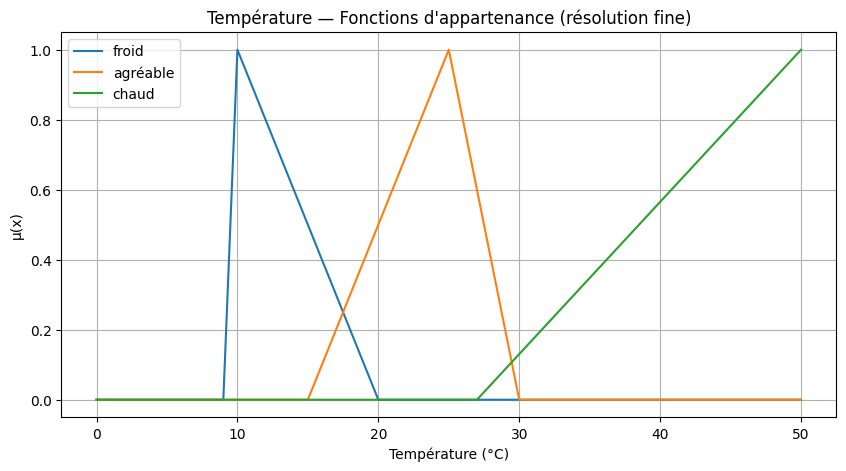

In [36]:
plt.figure(figsize=(10,5))
plt.plot(x_temp, froid, label='froid')
plt.plot(x_temp, agreable, label='agréable')
plt.plot(x_temp, chaud, label='chaud')
plt.title("Température — Fonctions d'appartenance (résolution fine)")
plt.xlabel("Température (°C)")
plt.ylabel("μ(x)")
plt.grid(True)
plt.legend()
plt.show()


## Étape 5 : Calcul manuel des degrés d’appartenance

In [37]:
# Fonction pour calculer μ(x) pour chaque ensemble
def calc_mu(temp):
    mu_f = fuzz.interp_membership(x_temp, froid, temp)
    mu_a = fuzz.interp_membership(x_temp, agreable, temp)
    mu_c = fuzz.interp_membership(x_temp, chaud, temp)
    return mu_f, mu_a, mu_c

# Exemple pour 18°C et 28°C
for t in [18, 28]:
    mu_f, mu_a, mu_c = calc_mu(t)
    print(f"{t}°C → Froid: {mu_f:.3f}, Agréable: {mu_a:.3f}, Chaud: {mu_c:.3f}")


18°C → Froid: 0.200, Agréable: 0.300, Chaud: 0.000
28°C → Froid: 0.000, Agréable: 0.400, Chaud: 0.043


## Étape 6 : Construire le système flou

In [38]:
# Variables floues
temperature = ctrl.Antecedent(x_temp, 'temperature')
temperature['froid'] = froid
temperature['agreable'] = agreable
temperature['chaud'] = chaud

vitesse = ctrl.Consequent(x_vitesse, 'vitesse')
vitesse['faible']  = faible
vitesse['moyenne'] = moyenne
vitesse['haute']   = haute

# Règles
r1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
r2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
r3 = ctrl.Rule(temperature['chaud'], vitesse['haute'])


## Étape 7 : Simuler le système

In [39]:
v_ctrl = ctrl.ControlSystem([r1, r2, r3])
sim = ctrl.ControlSystemSimulation(v_ctrl)
sim.input['temperature'] = 17
sim.compute()
print(f"Temp = 17°C → vitesse calculée = {sim.output['vitesse']:.2f}")


Temp = 17°C → vitesse calculée = 31.40


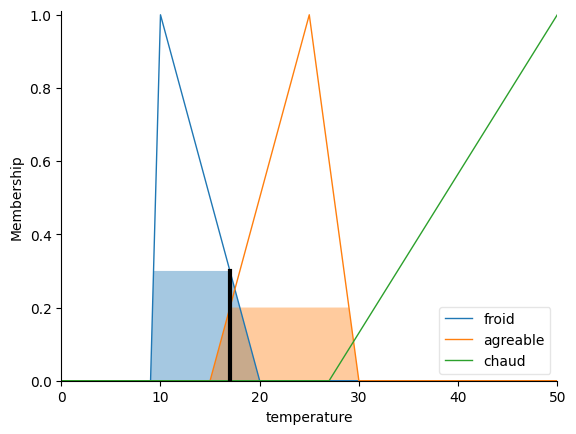

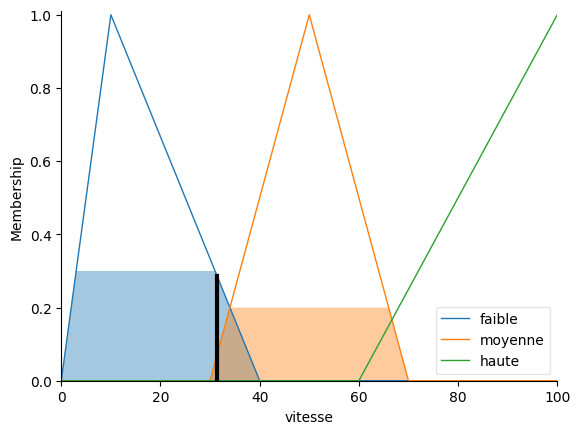

In [40]:
temperature.view(sim=sim); vitesse.view(sim=sim); plt.show()
